# Bike Ride Data Exploration
## by Chigozie Francis Obasi

## Introduction
> This exploration looks at figuring the factors that can determine the duration of a bike ride. It the explores the bike ride data made available in the project. Focus was to look at both categorical and numerical variables and how they impact the duration of a bike ride. I also explored the data to get insight into the relationship that exists between other variables in the data





## Preliminary Wrangling

> The data contained about 183412 rows of recorded bike rides with 16 columns that included start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id, end_station_name,end_station_latitude,end_station_longitude

> I also did some data cleaning and feature engineering to extract more variables that aided this analysis



In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from math import radians, cos, sin, asin, sqrt
%matplotlib inline

In [2]:
# load in the dataset into a pandas dataframe, print statistics
bike_data = pd.read_csv('201902-fordgobike-tripdata.csv')

In [3]:
bike_data.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes


In [4]:
bike_data.isnull().sum()

duration_sec                  0
start_time                    0
end_time                      0
start_station_id            197
start_station_name          197
start_station_latitude        0
start_station_longitude       0
end_station_id              197
end_station_name            197
end_station_latitude          0
end_station_longitude         0
bike_id                       0
user_type                     0
member_birth_year          8265
member_gender              8265
bike_share_for_all_trip       0
dtype: int64

In [5]:
bike_data.shape

(183412, 16)

In [6]:
bike_data.describe()

,duration_sec,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bike_id,member_birth_year
count,183412.000000,183215.000000,183412.000000,183412.000000,183215.000000,183412.000000,183412.000000,183412.000000,175147.000000
mean,726.078435,138.590427,37.771223,-122.352664,136.249123,37.771427,-122.352250,4472.906375,1984.806437
std,1794.389780,111.778864,0.099581,0.117097,111.515131,0.099490,0.116673,1664.383394,10.116689
min,61.000000,3.000000,37.317298,-122.453704,3.000000,37.317298,-122.453704,11.000000,1878.000000
25%,325.000000,47.000000,37.770083,-122.412408,44.000000,37.770407,-122.411726,3777.000000,1980.000000
50%,514.000000,104.000000,37.780760,-122.398285,100.000000,37.781010,-122.398279,4958.000000,1987.000000
75%,796.000000,239.000000,37.797280,-122.286533,235.000000,37.797320,-122.288045,5502.000000,1992.000000
max,85444.000000,398.000000,37.880222,-121.874119,398.000000,37.880222,-121.874119,6645.000000,2001.000000


In [7]:
bike_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             183412 non-null  int64  
 1   start_time               183412 non-null  object 
 2   end_time                 183412 non-null  object 
 3   start_station_id         183215 non-null  float64
 4   start_station_name       183215 non-null  object 
 5   start_station_latitude   183412 non-null  float64
 6   start_station_longitude  183412 non-null  float64
 7   end_station_id           183215 non-null  float64
 8   end_station_name         183215 non-null  object 
 9   end_station_latitude     183412 non-null  float64
 10  end_station_longitude    183412 non-null  float64
 11  bike_id                  183412 non-null  int64  
 12  user_type                183412 non-null  object 
 13  member_birth_year        175147 non-null  float64
 14  memb

### Data wrangling and Feature engineering

> The  below are some set of data wranglig and feature engineering done to get the data ready for analysis


> Seperate start_time and end_time columns into date(Year, Month, day), and time and convert to timestamp

> Convert start_time and end_time to timestamp
> convert start_station_id, end_station_id, bike_id to categorical column

> drop missing values(rows) in start_station_id, start_station_latitude,end_station_id, end_station_latitude



In [8]:
bike_data.columns

Index(['duration_sec', 'start_time', 'end_time', 'start_station_id',
       'start_station_name', 'start_station_latitude',
       'start_station_longitude', 'end_station_id', 'end_station_name',
       'end_station_latitude', 'end_station_longitude', 'bike_id', 'user_type',
       'member_birth_year', 'member_gender', 'bike_share_for_all_trip'],
      dtype='object')

In [9]:
# Python 3 program to calculate Distance Between Two Points on Earth
# Copied from https://www.geeksforgeeks.org/program-distance-two-points-earth/#:~:text=For%20this%20divide%20the%20values,is%20the%20radius%20of%20Earth.

def distance_km(lat1, lat2, lon1, lon2):
     
    # The math module contains a function named
    # radians which converts from degrees to radians.
    lon1 = radians(lon1)
    lon2 = radians(lon2)
    lat1 = radians(lat1)
    lat2 = radians(lat2)
      
    # Haversine formula
    dlon = lon2 - lon1
    dlat = lat2 - lat1
    a = sin(dlat / 2)**2 + cos(lat1) * cos(lat2) * sin(dlon / 2)**2
 
    c = 2 * asin(sqrt(a))
    
    # Radius of earth in kilometers. Use 3956 for miles
    r = 6371
      
    # calculate the result
    return(c * r)*1000
     
     

In [10]:
#getting distance in meters using points latitutude and longitude

bike_data['distance_meter']= bike_data.apply(lambda x: distance_km(x.start_station_latitude, x.end_station_latitude, x.start_station_longitude, x.end_station_longitude), axis=1)

In [11]:
#Converting datatype of start_time and end_time columns

bike_data['start_time'] = pd.to_datetime(bike_data['start_time'], format='%Y/%m/%d %H:%M:%S')

bike_data['end_time'] = pd.to_datetime(bike_data['end_time'], format='%Y/%m/%d %H:%M:%S')

In [12]:
#Getting just month

bike_data['start_month'] = bike_data['start_time'].dt.month

bike_data['end_month'] = bike_data['end_time'].dt.month

In [13]:
bike_data.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,distance_meter,start_month,end_month
0,52185,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No,544.708503,2,3
1,42521,2019-02-28 18:53:21.789,2019-03-01 06:42:03.056,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No,1742.999137,2,3
2,61854,2019-02-28 12:13:13.218,2019-03-01 05:24:08.146,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No,2704.545131,2,3
3,36490,2019-02-28 17:54:26.010,2019-03-01 04:02:36.842,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No,260.738544,2,3
4,1585,2019-02-28 23:54:18.549,2019-03-01 00:20:44.074,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes,2409.301416,2,3


In [14]:
#Getting just day

bike_data['start_day'] = bike_data['start_time'].dt.day

bike_data['end_day'] = bike_data['end_time'].dt.day

In [15]:
bike_data['start_time'].dt.weekday

0         3
1         3
2         3
3         3
4         3
         ..
183407    4
183408    4
183409    4
183410    4
183411    4
Name: start_time, Length: 183412, dtype: int64

In [16]:
bike_data['end_time'].dt.weekday

0         4
1         4
2         4
3         4
4         4
         ..
183407    4
183408    4
183409    4
183410    4
183411    4
Name: end_time, Length: 183412, dtype: int64

def startweekday2(start):
    weekDays = ("Monday","Tuesday","Wednesday","Thursday","Friday","Saturday","Sunday")
    #day_num = start.dt.weekday
    day = [weekDays[num] for num in start]
    return day
    
def endweekday2(end):
    weekDays = ("Monday","Tuesday","Wednesday","Thursday","Friday","Saturday","Sunday")
    day_num = end.dt.weekday
    return weekDays[day_num]
    

In [17]:
### Getting the week day series

weekDays = ("Monday","Tuesday","Wednesday","Thursday","Friday","Saturday","Sunday")

start_weekday = [weekDays[num] for num in bike_data['start_time'].dt.weekday]

end_weekday = [weekDays[num] for num in bike_data['end_time'].dt.weekday]


In [18]:
### start weekday

bike_data['start_weekday'] = start_weekday


In [19]:
### end weekday


bike_data['end_weekday'] = end_weekday

In [20]:
bike_data.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,...,member_birth_year,member_gender,bike_share_for_all_trip,distance_meter,start_month,end_month,start_day,end_day,start_weekday,end_weekday
0,52185,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,...,1984.0,Male,No,544.708503,2,3,28,1,Thursday,Friday
1,42521,2019-02-28 18:53:21.789,2019-03-01 06:42:03.056,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,...,NaN,NaN,No,1742.999137,2,3,28,1,Thursday,Friday
2,61854,2019-02-28 12:13:13.218,2019-03-01 05:24:08.146,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,...,1972.0,Male,No,2704.545131,2,3,28,1,Thursday,Friday
3,36490,2019-02-28 17:54:26.010,2019-03-01 04:02:36.842,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,...,1989.0,Other,No,260.738544,2,3,28,1,Thursday,Friday
4,1585,2019-02-28 23:54:18.549,2019-03-01 00:20:44.074,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,...,1974.0,Male,Yes,2409.301416,2,3,28,1,Thursday,Friday


In [21]:
bike_data['speed'] = bike_data['distance_meter'] / bike_data['duration_sec']

In [22]:
bike_data.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,...,member_gender,bike_share_for_all_trip,distance_meter,start_month,end_month,start_day,end_day,start_weekday,end_weekday,speed
0,52185,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,...,Male,No,544.708503,2,3,28,1,Thursday,Friday,0.010438
1,42521,2019-02-28 18:53:21.789,2019-03-01 06:42:03.056,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,...,NaN,No,1742.999137,2,3,28,1,Thursday,Friday,0.040991
2,61854,2019-02-28 12:13:13.218,2019-03-01 05:24:08.146,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,...,Male,No,2704.545131,2,3,28,1,Thursday,Friday,0.043725
3,36490,2019-02-28 17:54:26.010,2019-03-01 04:02:36.842,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,...,Other,No,260.738544,2,3,28,1,Thursday,Friday,0.007145
4,1585,2019-02-28 23:54:18.549,2019-03-01 00:20:44.074,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,...,Male,Yes,2409.301416,2,3,28,1,Thursday,Friday,1.520064


In [23]:
bike_data.isnull().sum()

duration_sec                  0
start_time                    0
end_time                      0
start_station_id            197
start_station_name          197
start_station_latitude        0
start_station_longitude       0
end_station_id              197
end_station_name            197
end_station_latitude          0
end_station_longitude         0
bike_id                       0
user_type                     0
member_birth_year          8265
member_gender              8265
bike_share_for_all_trip       0
distance_meter                0
start_month                   0
end_month                     0
start_day                     0
end_day                       0
start_weekday                 0
end_weekday                   0
speed                         0
dtype: int64

#getting start_time and end_time weekday

bike_data['start_weekday']= bike_data.apply(lambda x: startweekday(x['start_time']), axis=1)


bike_data['end_weekday']= bike_data.apply(lambda x: endweekday(x['end_time']), axis=1)


In [24]:
## Drop Missing rows
bike_data.dropna(axis = 0, how ='any', inplace = True)



In [25]:
### Confirming no missing items

bike_data.isnull().sum()

duration_sec               0
start_time                 0
end_time                   0
start_station_id           0
start_station_name         0
start_station_latitude     0
start_station_longitude    0
end_station_id             0
end_station_name           0
end_station_latitude       0
end_station_longitude      0
bike_id                    0
user_type                  0
member_birth_year          0
member_gender              0
bike_share_for_all_trip    0
distance_meter             0
start_month                0
end_month                  0
start_day                  0
end_day                    0
start_weekday              0
end_weekday                0
speed                      0
dtype: int64

In [26]:
### Reset Index

bike_data.reset_index(inplace = True)


In [27]:
bike_data.columns

Index(['index', 'duration_sec', 'start_time', 'end_time', 'start_station_id',
       'start_station_name', 'start_station_latitude',
       'start_station_longitude', 'end_station_id', 'end_station_name',
       'end_station_latitude', 'end_station_longitude', 'bike_id', 'user_type',
       'member_birth_year', 'member_gender', 'bike_share_for_all_trip',
       'distance_meter', 'start_month', 'end_month', 'start_day', 'end_day',
       'start_weekday', 'end_weekday', 'speed'],
      dtype='object')

In [28]:
### droping index

bike_data.drop(['index'],axis=1, inplace = True)

In [29]:
bike_data['age'] = bike_data['start_time'].dt.year - bike_data['member_birth_year']

In [30]:
bike_data.columns

Index(['duration_sec', 'start_time', 'end_time', 'start_station_id',
       'start_station_name', 'start_station_latitude',
       'start_station_longitude', 'end_station_id', 'end_station_name',
       'end_station_latitude', 'end_station_longitude', 'bike_id', 'user_type',
       'member_birth_year', 'member_gender', 'bike_share_for_all_trip',
       'distance_meter', 'start_month', 'end_month', 'start_day', 'end_day',
       'start_weekday', 'end_weekday', 'speed', 'age'],
      dtype='object')

In [31]:
### Droping columns I don't need for the analysis

bike_data.drop([ 'start_station_id',
       'start_station_name', 'start_station_latitude',
       'start_station_longitude', 'end_station_id', 'end_station_name',
       'end_station_latitude', 'end_station_longitude',], axis=1, inplace = True)

In [32]:
bike_data.head()

,duration_sec,start_time,end_time,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,distance_meter,start_month,end_month,start_day,end_day,start_weekday,end_weekday,speed,age
0,52185,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,4902,Customer,1984.0,Male,No,544.708503,2,3,28,1,Thursday,Friday,0.010438,35.0
1,61854,2019-02-28 12:13:13.218,2019-03-01 05:24:08.146,5905,Customer,1972.0,Male,No,2704.545131,2,3,28,1,Thursday,Friday,0.043725,47.0
2,36490,2019-02-28 17:54:26.010,2019-03-01 04:02:36.842,6638,Subscriber,1989.0,Other,No,260.738544,2,3,28,1,Thursday,Friday,0.007145,30.0
3,1585,2019-02-28 23:54:18.549,2019-03-01 00:20:44.074,4898,Subscriber,1974.0,Male,Yes,2409.301416,2,3,28,1,Thursday,Friday,1.520064,45.0
4,1793,2019-02-28 23:49:58.632,2019-03-01 00:19:51.760,5200,Subscriber,1959.0,Male,No,3332.202628,2,3,28,1,Thursday,Friday,1.858451,60.0


In [33]:
#Converting member_birth_year to category column


bike_data['member_birth_year'] = bike_data.member_birth_year.astype('category')

In [34]:
#Converting bike_id to category column

bike_data['bike_id'] = bike_data.bike_id.astype('category')

In [35]:
bike_data.describe()

,duration_sec,distance_meter,start_month,end_month,start_day,end_day,speed,age
count,174952.000000,174952.000000,174952.0,174952.000000,174952.000000,174952.000000,174952.000000,174952.000000
mean,704.002744,1690.049108,2.0,2.000080,15.312337,15.311714,3.011122,34.196865
std,1642.204905,1096.956722,0.0,0.008945,8.033926,8.034127,1.087181,10.118731
min,61.000000,0.000000,2.0,2.000000,1.000000,1.000000,0.000000,18.000000
25%,323.000000,910.443204,2.0,2.000000,8.000000,8.000000,2.424473,27.000000
50%,510.000000,1429.829338,2.0,2.000000,15.000000,15.000000,3.076211,32.000000
75%,789.000000,2224.009909,2.0,2.000000,22.000000,22.000000,3.712977,39.000000
max,84548.000000,69469.240682,2.0,3.000000,28.000000,28.000000,10.002770,141.000000


In [36]:
bike_data.dtypes

duration_sec                        int64
start_time                 datetime64[ns]
end_time                   datetime64[ns]
bike_id                          category
user_type                          object
member_birth_year                category
member_gender                      object
bike_share_for_all_trip            object
distance_meter                    float64
start_month                         int64
end_month                           int64
start_day                           int64
end_day                             int64
start_weekday                      object
end_weekday                        object
speed                             float64
age                               float64
dtype: object

In [37]:
bike_data.shape

(174952, 17)

#### Visualization to be done

I want to check the factors that may drive duration

> Univa

Bar chart = Count of gender, user_type, start_weekday and end_weekday
Histogram = speeed, distance
bike_share count
When are most trips taken in terms of time of day, day of the week, or month of the year?

> dual

distance and duration i.e How long does the average trip  take?
Speed and duration
gender and duration
usertype and duration i.e user_type of biker as it affect duration
bike_share and duration





> multi

Start day trends of distance or speed or duration covered by gender or user type

speed, usertype and duration

distance, speed, duration covered by gender, user type



In [38]:
bike_data.columns

Index(['duration_sec', 'start_time', 'end_time', 'bike_id', 'user_type',
       'member_birth_year', 'member_gender', 'bike_share_for_all_trip',
       'distance_meter', 'start_month', 'end_month', 'start_day', 'end_day',
       'start_weekday', 'end_weekday', 'speed', 'age'],
      dtype='object')

In [39]:
# Source: https://stackoverflow.com/questions/13331698/how-to-apply-a-function-to-two-columns-of-pandas-dataframe


#df['col_3'] = df.apply(lambda x: f(x.col_1, x.col_2), axis=1)
#df['col_3'] = df.apply(lambda x: get_sublist(x.col_1, x.col_2), axis=1)

### What is the structure of your dataset?

> There are 174952 recording of bikes duration with 17 features. Most variables are numerical with bike_id, user_type, member_birth_year, member_gender, bike_share_for_all_trip, start_weekday, end_weekday as categorical variables. None of the categorical columns can be classified as ordinal.

### What is/are the main feature(s) of interest in your dataset?

> I am interested in finding out what features are best for predicting the duration of each bike rides in the dataset.And find existing relationship between columns in the data

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> I expect that speed and distance to have the strongest effect on each bike's duration: the shorter the distance, the shorter the duration, the higher the speed, the shorter the duration. I also think that bike_share_for_all_trip, age, member_gender, start_weekday and end_weekday, will have effects on the duration, though to a much smaller degree than the main effect of distance and speed.

## Univariate Exploration



#### Distribution of duration_sec 





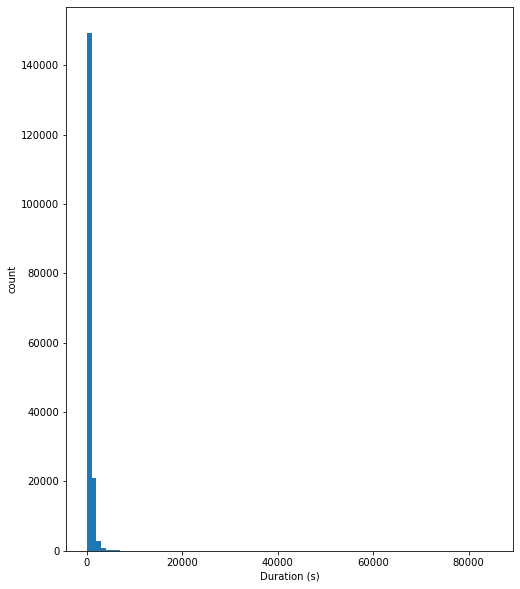

In [40]:
# start with a standard-scaled plot for duration
binsize = 1000
bins = np.arange(0, bike_data['duration_sec'].max()+binsize, binsize)

plt.figure(figsize=[8, 10])
plt.hist(data = bike_data, x = 'duration_sec', bins=bins)
plt.xlabel('Duration (s)')
plt.ylabel('count')
plt.show()

duration_sec has a long tailed to the right with most ride duration coming below 1000 seconds

In [41]:
np.log10(bike_data['duration_sec'].describe())

count    5.242919
mean     2.847574
std      3.215427
min      1.785330
25%      2.509203
50%      2.707570
75%      2.897077
max      4.927103
Name: duration_sec, dtype: float64

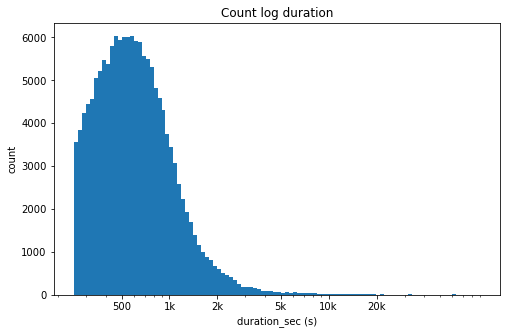

In [42]:
# there's a short tail in the distribution, so let's put it on a log scale instead
log_binsize = 0.025
bins2 = 10 ** np.arange(2.4, np.log10(bike_data['duration_sec'].max())+log_binsize, log_binsize)

plt.figure(figsize=[8, 5])
plt.hist(data = bike_data, x = 'duration_sec', bins = bins2)
plt.xscale('log')
plt.xticks([500, 1e3, 2e3, 5e3, 1e4, 2e4], [500, '1k', '2k', '5k', '10k', '20k'])
plt.xlabel('duration_sec (s)')
plt.ylabel('count')
plt.title('Count log duration')
plt.show()

From the above, we can see some outliers in duration above 5000 seconds. While most of the data is between 200 and 2000 seconds with peak at 500 seconds


> **What is the distribution of speed?** 

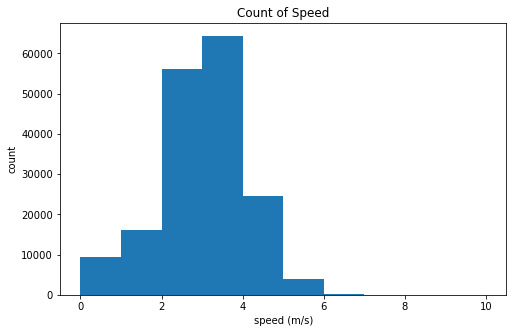

In [43]:
# start with a standard-scaled plot for speed
#binsize = 2
#bins = np.arange(0, bike_data['speed'].max()+binsize, binsize)

plt.figure(figsize=[8, 5])
plt.hist(data = bike_data, x = 'speed')
plt.xlabel('speed (m/s)')
plt.ylabel('count')
plt.title('Count of Speed')
plt.show()

Speed has a nearly normal distribution, with a lot of bike_data duration coming between  bike speed of 2 and 4 meters per second.

> **What is the distribution of distance?**

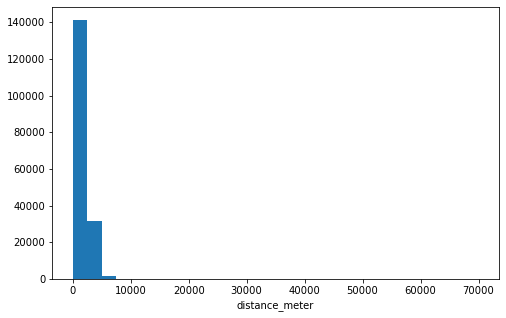

In [44]:
# plotting carat on a standard scale
binsize = 2500
bins = np.arange(0, bike_data['distance_meter'].max()+binsize, binsize)

plt.figure(figsize=[8, 5])
plt.hist(data = bike_data, x = 'distance_meter', bins = bins)
#plt.xlim([0,50000])
plt.xlabel('distance_meter')
plt.show()

Distance has a short-tailed distribution, with a lot of duration reached on short distance, and bike rides on the long 

distance.

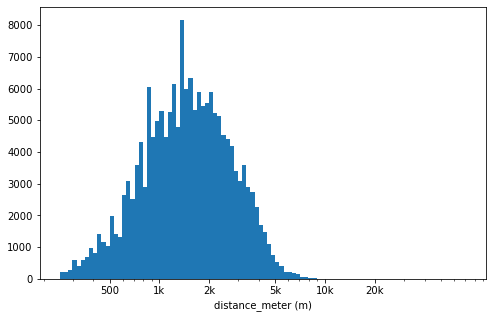

In [45]:
# there's a short tail in the distribution, so let's put it on a log scale instead
log_binsize = 0.025
bins2 = 10 ** np.arange(2.4, np.log10(bike_data['distance_meter'].max())+log_binsize, log_binsize)

plt.figure(figsize=[8, 5])
plt.hist(data = bike_data, x = 'distance_meter', bins = bins2)
plt.xscale('log')
plt.xticks([500, 1e3, 2e3, 5e3, 1e4, 2e4], [500, '1k', '2k', '5k', '10k', '20k'])
plt.xlabel('distance_meter (m)')
plt.show()

 When plotted on a log-scale, the distance distribution looks roughly normal distribution shaped. From the log plot it 

can be seen that most of the distance data is roughly between 900 and 3000 meters with the peak value roughly at 1500 meters.

In [46]:
bike_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 174952 entries, 0 to 174951
Data columns (total 17 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   duration_sec             174952 non-null  int64         
 1   start_time               174952 non-null  datetime64[ns]
 2   end_time                 174952 non-null  datetime64[ns]
 3   bike_id                  174952 non-null  category      
 4   user_type                174952 non-null  object        
 5   member_birth_year        174952 non-null  category      
 6   member_gender            174952 non-null  object        
 7   bike_share_for_all_trip  174952 non-null  object        
 8   distance_meter           174952 non-null  float64       
 9   start_month              174952 non-null  int64         
 10  end_month                174952 non-null  int64         
 11  start_day                174952 non-null  int64         
 12  end_day         


> **Which gender is most represented in the dataset?**

> **Are bike ride mostly shared or not?**

> **Which member type has the most bike rides?**

> **On what day of the week has the does a bike ride start often?**

> **On what day of the week does a bike ride end often?**

##### I'll look at the categorical variables to see the count of these features.

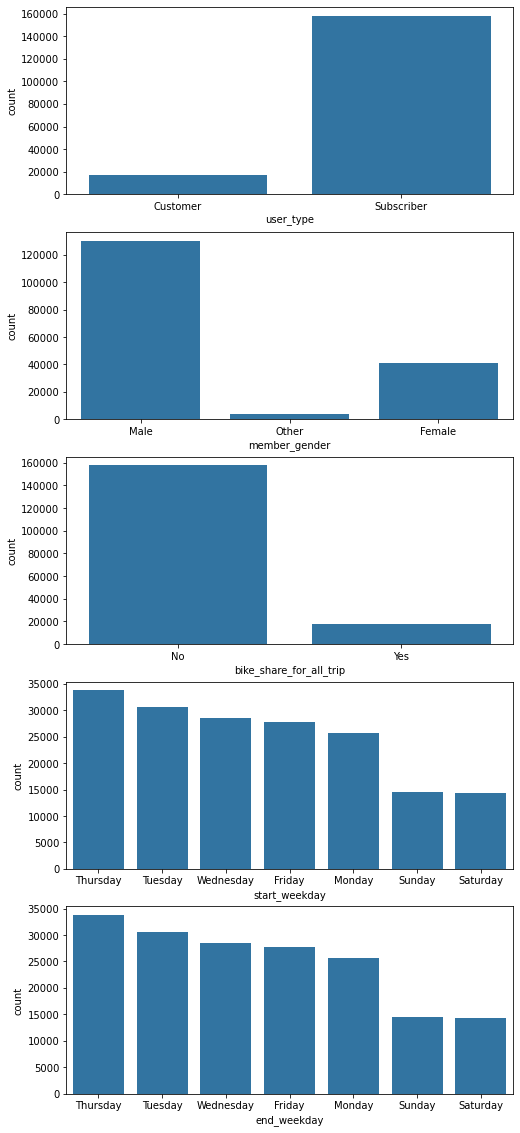

In [47]:

fig, ax = plt.subplots(nrows=5, figsize = [8,20])

order = bike_data['start_weekday'].value_counts().index
order2 = bike_data['end_weekday'].value_counts().index

default_color = sb.color_palette()[0]
sb.countplot(data = bike_data, x = 'user_type', color = default_color, ax = ax[0])
sb.countplot(data = bike_data, x = 'member_gender', color = default_color, ax = ax[1])
sb.countplot(data = bike_data, x = 'bike_share_for_all_trip', color = default_color, ax = ax[2])

sb.countplot(data = bike_data, x = 'start_weekday', color = default_color, ax = ax[3], order = order)
sb.countplot(data = bike_data, x = 'end_weekday', color = default_color, ax = ax[4], order = order2)

plt.show()

From the above visuals there are more subscribers than customers in the user type, more males than females, the number of bikers that do not share their rides is more than those that share riders and the rides mostly begin and ends on thursday 

##### I'll now look at the age feature in the data to see if any of it hold interesting properties.

In [48]:
# The maximum bike age looks suspicious given that bike age at 75 percentile is 39

bike_data['age'].max()

141.0

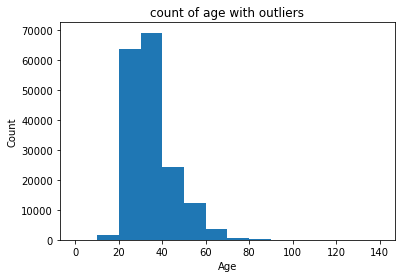

In [49]:
binsize = 2
bins = np.arange(0, bike_data['age'].max()+binsize, 10)
plt.hist(data = bike_data, x = 'age', bins=bins)
plt.ylabel('Count')
plt.xlabel('Age')
plt.title('count of age with outliers');

From the above plot, it can be deduce that from the data, most of age of riders are between 20 to 60 years old.

It appears that some outliers exists in the data and one which needs to be investiagted with decision of removing these 
outliers or replacing them with average

In [50]:
bike_data[bike_data['age'] > bike_data.age.quantile(0.75)]['age'].unique()

#### Only 22 unique values are above 70 years. Let me take a look at these values to see if any irregularities. Most likely typo error

array([ 47.,  45.,  60.,  44.,  41.,  46.,  48.,  40.,  52.,  42.,  50.,
        56.,  43.,  55.,  54.,  58.,  51.,  53.,  57.,  65.,  61.,  59.,
        49.,  63.,  62.,  74., 119.,  67.,  71.,  68.,  78.,  69.,  70.,
        66.,  64.,  73.,  72.,  88.,  76.,  77.,  99.,  86., 141., 118.,
        75.,  91.,  85.,  80.,  89., 117., 109.,  81.,  92.])

In [51]:
bike_data_70 = bike_data[bike_data['age'] >70] 
bike_data_70

,duration_sec,start_time,end_time,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,distance_meter,start_month,end_month,start_day,end_day,start_weekday,end_weekday,speed,age
1033,303,2019-02-28 19:49:38.120,2019-02-28 19:54:42.044,6333,Subscriber,1945.0,Male,Yes,974.667015,2,2,28,28,Thursday,Thursday,3.216723,74.0
1238,148,2019-02-28 19:29:17.627,2019-02-28 19:31:45.967,5391,Subscriber,1900.0,Male,Yes,792.753345,2,2,28,28,Thursday,Thursday,5.356442,119.0
1524,683,2019-02-28 18:52:11.054,2019-02-28 19:03:34.528,4976,Subscriber,1948.0,Male,No,1188.591760,2,2,28,28,Thursday,Thursday,1.740251,71.0
2000,694,2019-02-28 18:21:05.187,2019-02-28 18:32:39.596,385,Subscriber,1941.0,Male,No,1794.856212,2,2,28,28,Thursday,Thursday,2.586248,78.0
2272,191,2019-02-28 18:14:07.503,2019-02-28 18:17:18.808,6558,Subscriber,1945.0,Male,Yes,974.667015,2,2,28,28,Thursday,Thursday,5.102969,74.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173987,258,2019-02-01 08:22:39.510,2019-02-01 08:26:57.514,841,Subscriber,1947.0,Male,No,632.718412,2,2,1,1,Friday,Friday,2.452397,72.0
174402,428,2019-02-01 07:45:05.934,2019-02-01 07:52:14.922,5031,Subscriber,1901.0,Male,No,1029.114397,2,2,1,1,Friday,Friday,2.404473,118.0
174773,191,2019-02-01 06:32:38.467,2019-02-01 06:35:50.222,3108,Subscriber,1947.0,Male,No,623.298416,2,2,1,1,Friday,Friday,3.263342,72.0
174926,400,2019-02-01 00:46:47.276,2019-02-01 00:53:27.596,3487,Subscriber,1945.0,Male,Yes,773.155021,2,2,1,1,Friday,Friday,1.932888,74.0


In [52]:
##np.where((bike_data.age>90), bike_data['age'].mean(), bike_data.age)

In [53]:
bike_data['age'].where(~(bike_data.age > 70), other=bike_data['age'].mode(), inplace=True)


Text(0.5, 1.0, 'count of age')

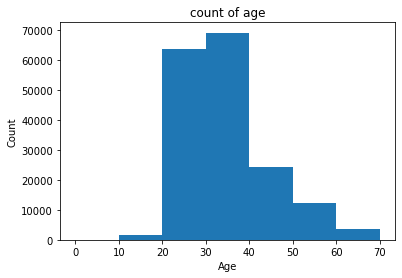

In [54]:
binsize = 2
bins = np.arange(0, bike_data['age'].max()+binsize, 10)
plt.hist(data = bike_data, x = 'age', bins=bins);
plt.ylabel('Count')
plt.xlabel('Age')
plt.title('count of age')


Age is right skewed. Most of the ages of riders falls between 20 and 50

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> The distance variable took on a large range of values, so I looked at the data using a log transform. Under the transformation, the data looked normal distribution, with one peak between  900 𝑎𝑛𝑑 3000 meeters.Highest peak was at roughly 1500 meters.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> On analysis, it was seen that the age column has some outliers with age above 70 in which it is usually not safe to ride bike. The values above 70 years where replaced with the overall mode of the age column since mean is usually affected by outliers

## Bivariate Exploration

> I started by looking at correlation between features

In [55]:
bike_data.dtypes

duration_sec                        int64
start_time                 datetime64[ns]
end_time                   datetime64[ns]
bike_id                          category
user_type                          object
member_birth_year                category
member_gender                      object
bike_share_for_all_trip            object
distance_meter                    float64
start_month                         int64
end_month                           int64
start_day                           int64
end_day                             int64
start_weekday                      object
end_weekday                        object
speed                             float64
age                               float64
dtype: object

In [56]:
numeric_vars = ['duration_sec','distance_meter', 'speed', 'age']
categoric_vars = ['user_type', 'member_gender', 'bike_share_for_all_trip']

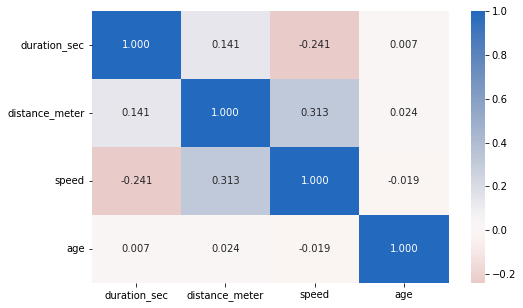

In [57]:
# correlation plot
plt.figure(figsize = [8, 5])
sb.heatmap(bike_data[numeric_vars].corr(), annot = True, fmt = '.3f',
           cmap = 'vlag_r', center = 0)
plt.show()

From the above hearmap, we can see that there is a negative correlation between duration_sec and speed, while speed and distance is postively correlated suggesting that more distance is covered as the speed increase. Correlation between duration_sec and age seems negligible. This is quite surprising because one can assume that younger riders should tend to have shorter duration. This calls for s deep dive into the age to ascerting it accuracy.

bike_data.shape= (174952, 17)
bike_data.shape= (2000, 17)


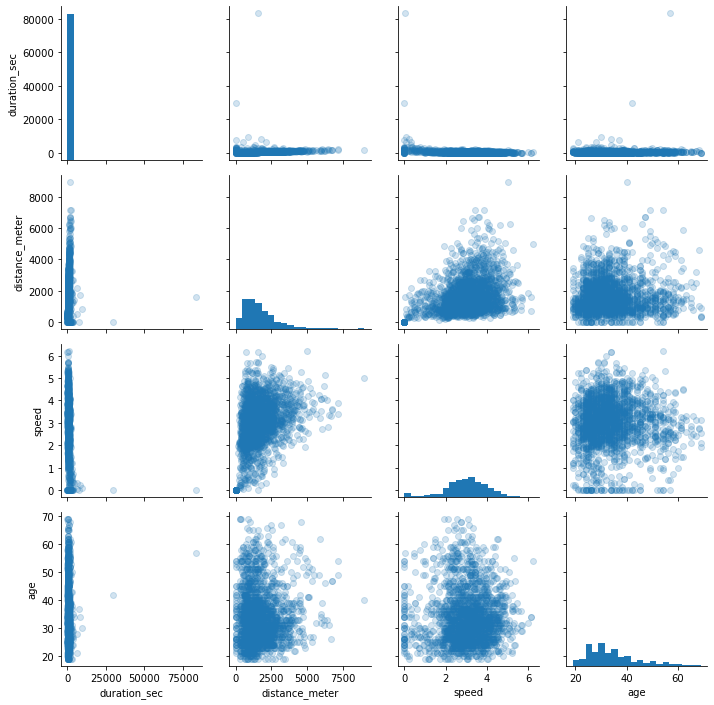

In [58]:
# plot matrix: sample 500 diamonds so that plots are clearer and they render faster
print("bike_data.shape=", bike_data.shape)
bike_data_samp = bike_data.sample(n=2000, replace = False)
print("bike_data.shape=",bike_data_samp.shape)

g = sb.PairGrid(data = bike_data_samp, vars = numeric_vars)
g = g.map_diag(plt.hist, bins = 20);
g.map_offdiag(plt.scatter, alpha=0.2)

This is another visual of the correlation between variables in the data and plotting their histogram

In [59]:
# compute the logarithm of duration_sec to make multivariate plotting easier

def log_trans(x, inverse = False):
    """ quick function for computing log and power operations """
    if not inverse:
        return np.log10(x)
    else:
        return np.power(10, x)



In [60]:
bike_data['log_distance'] = bike_data['distance_meter'].apply(log_trans)

In [61]:
bike_data['log_duration_sec'] = bike_data['duration_sec'].apply(log_trans)

##### Does higher speed  lead to high shorter duration

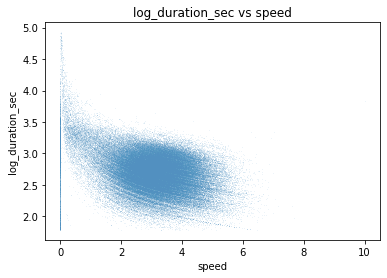

In [62]:

sb.scatterplot(x="speed", y="log_duration_sec", data=bike_data, s=1, alpha=0.1);
plt.title('log_duration_sec vs speed');

In [63]:
bike_data.columns

Index(['duration_sec', 'start_time', 'end_time', 'bike_id', 'user_type',
       'member_birth_year', 'member_gender', 'bike_share_for_all_trip',
       'distance_meter', 'start_month', 'end_month', 'start_day', 'end_day',
       'start_weekday', 'end_weekday', 'speed', 'age', 'log_distance',
       'log_duration_sec'],
      dtype='object')

As the speed increases the duration reduces

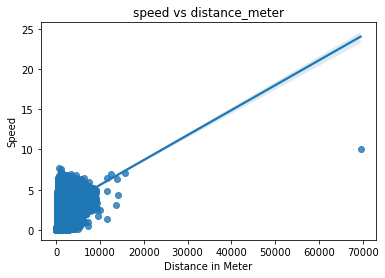

In [64]:
sb.regplot(data = bike_data, x = 'distance_meter', y = 'speed');
plt.xlabel('Distance in Meter')
plt.ylabel('Speed')
plt.title('speed vs distance_meter');

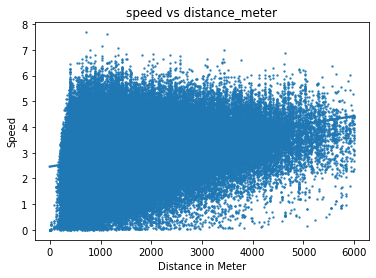

In [65]:
#Removing distance outliers


sb.regplot(x='distance_meter', y='speed', data=bike_data[bike_data['distance_meter']<6000],
            marker='o', scatter_kws={'s':2});
plt.xlabel('Distance in Meter')
plt.ylabel('Speed')
plt.title('speed vs distance_meter');

As expected, the correlation between duration_sec and speed is negative. It can be deduce that as the speed increases, the duration sec reduces. Also, speed is positively correlated with distance_meter which suggest that as the distance increases, riders increased their speed. Perhapd to gain grounds and complete the ride. However, this correlation is slightly weak. 



Surprisingly, the correlation coefficient between age and other numerical variables is week across board. Perhaps, given the number of member ages that is arguable high and distorted. I will not be using this variable in subsequent analysis.


##### Questions to answer

> What is the proportion of usertype that is male, female or other?

> What is the proportion of usertype involves in bike_sharing?

> Which gender is mostly involved in bike sharing withing the data set?

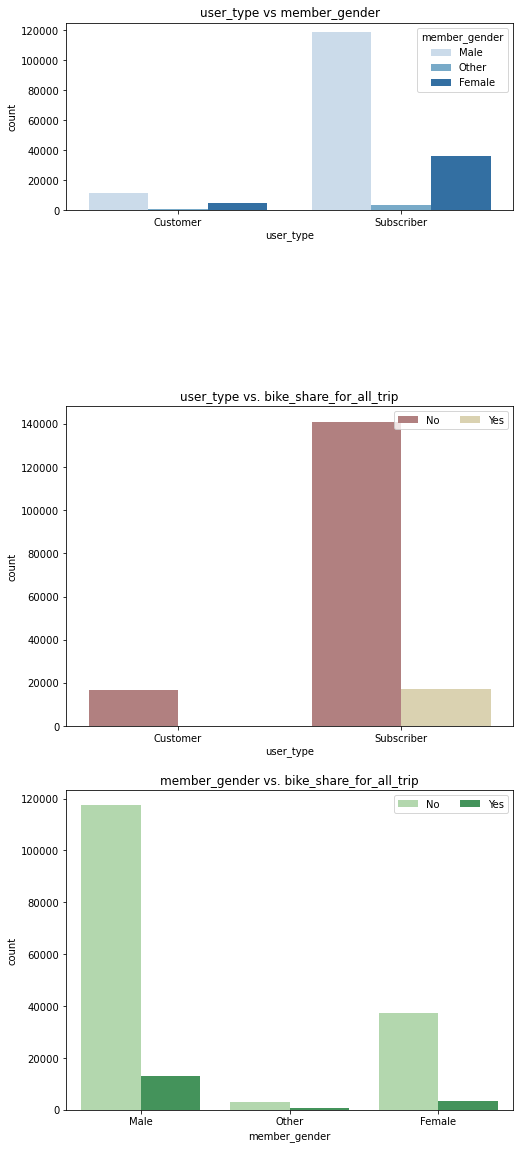

In [66]:
# since no much different in count histogram of start_weekday and end_weekday as seen above, we will not be using these variables.
# There's only 4 subplots to create, using the full data should be fine.

categoric_vars = ['user_type', 'member_gender', 'bike_share_for_all_trip']

plt.figure(figsize = [8, 20])

# subplot 1: user_type vs member_gender
plt.subplot(5, 1, 1)
plt.title("user_type vs member_gender")
sb.countplot(data = bike_data, x = 'user_type', hue = 'member_gender', palette = 'Blues')

# subplot 2: user_type vs. bike_share_for_all_trip
ax = plt.subplot(3, 1, 2)
plt.title("user_type vs. bike_share_for_all_trip")
sb.countplot(data = bike_data, x = 'user_type', hue = 'bike_share_for_all_trip', palette = 'pink')
ax.legend(ncol = 2) # re-arrange legend to reduce overlapping

# subplot 3: member_gender vs. bike_share_for_all_trip, use different color palette
ax = plt.subplot(3, 1, 3)
plt.title("member_gender vs. bike_share_for_all_trip")
sb.countplot(data = bike_data, x = 'member_gender', hue = 'bike_share_for_all_trip', palette = 'Greens')
ax.legend(loc = 1, ncol = 2) # re-arrange legend to remove overlapping

plt.show()

The number of female users who are subscribers are more than those who are customers. It can also be inferred those subscribers loves sharing their bikes than customers, with a high proportion of users who share bikes been male

In [67]:
bike_data.columns

Index(['duration_sec', 'start_time', 'end_time', 'bike_id', 'user_type',
       'member_birth_year', 'member_gender', 'bike_share_for_all_trip',
       'distance_meter', 'start_month', 'end_month', 'start_day', 'end_day',
       'start_weekday', 'end_weekday', 'speed', 'age', 'log_distance',
       'log_duration_sec'],
      dtype='object')

##### What day of the week has the shortest bike_ride duration? Visualization

In [68]:
# Convert the "start_weekday" and "end_weekday" column from a plain object type into an ordered categorical type
day_classes = ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']
vclasses = pd.api.types.CategoricalDtype(ordered=True, categories=day_classes)
bike_data['end_weekday'] = bike_data['end_weekday'].astype(vclasses);
bike_data['start_weekday'] = bike_data['start_weekday'].astype(vclasses);


<AxesSubplot:title={'center':'Duration by weekday'}, xlabel='Ride End Day', ylabel='mean_duration_sec'>

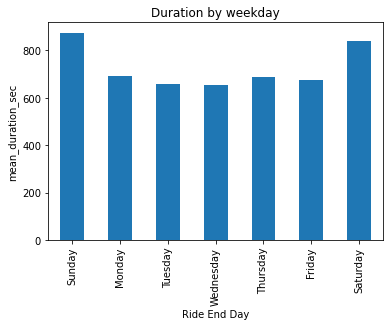

In [69]:

bike_data.groupby("end_weekday").duration_sec.mean().plot(kind="bar",title='Duration by weekday', ylabel='mean_duration_sec',
         xlabel='Ride End Day')

It appears that the duration of bike_rides on weekends is longer that that of weekdays with Tuesday bike rides coming low. 

It seemed like riding bike is a means of transportation to work

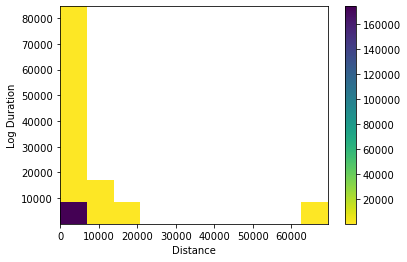

In [70]:
# Use cmin to set a minimum bound of counts 
# Use cmap to reverse the color map. 
# Specify bin edges 



plt.hist2d(data = bike_data, x = 'distance_meter', y = 'duration_sec', cmin=0.5, cmap='viridis_r')
plt.colorbar()
plt.ylabel('Log Duration')
plt.xlabel('Distance');

##### Which day of the week had the highest distance travelled?

Text(0.5, 1.0, 'distance vs day of the week')

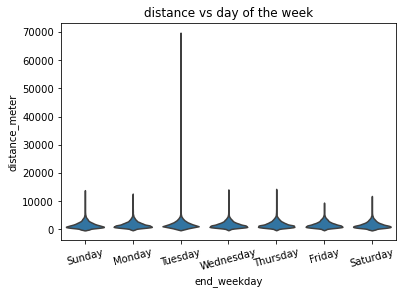

In [71]:
base_color = sb.color_palette()[0]

# The "inner" argument represents the datapoints in the violin interior. 
# It can take any value from {“box”, “quartile”, “point”, “stick”, None}
# If "box", it draws a miniature boxplot. 
sb.violinplot(data=bike_data, x='end_weekday', y='distance_meter', color=base_color, inner=None)
plt.xticks(rotation=15);
plt.title('distance vs day of the week')

Tuesday had the longest trip by distance covered by bike_riders

In [72]:
#Which usertype covered the most distance and why is beause the share bike often or speed
# which usertype shared bike most often (count of bike share)
# Which usertype had the most speed across the data


### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> Weekends has the longer rides duration than weekdays. Perhaps more people are in a hurry to get to work or use weekends to relax and exercise without the need to hasten up their trip.

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> More distance are covered on Tuesday than any other days. This call for further drill down to find out the reason or if this is a case of an outlier

## Multivariate Exploration

> Create plots of three or more variables to investigate your data even
further. Make sure that your investigations are justified, and follow from
your work in the previous sections.

In [73]:
bike_data.columns, bike_data.shape

(Index(['duration_sec', 'start_time', 'end_time', 'bike_id', 'user_type',
        'member_birth_year', 'member_gender', 'bike_share_for_all_trip',
        'distance_meter', 'start_month', 'end_month', 'start_day', 'end_day',
        'start_weekday', 'end_weekday', 'speed', 'age', 'log_distance',
        'log_duration_sec'],
       dtype='object'),
 (174952, 19))

##### Does bike_sharing affects the distance covered by different user_type

Text(0.5, 1.0, 'distance vs usertype and bike_sharing')

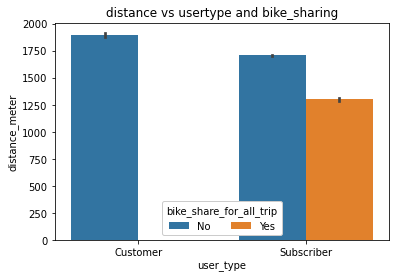

In [74]:
ax = sb.barplot(data = bike_data, x = 'user_type', y = 'distance_meter', hue = 'bike_share_for_all_trip')
ax.legend(loc = 8, ncol = 3, framealpha = 1, title = 'bike_share_for_all_trip');
plt.title('distance vs usertype and bike_sharing')

User types with high number of bike sharing tend not to covered more distance. It seems like non of the riders who are customers are willing to share their bikes

C:\Users\franc\anaconda3\envs\alx_data_env\lib\site-packages\seaborn\axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


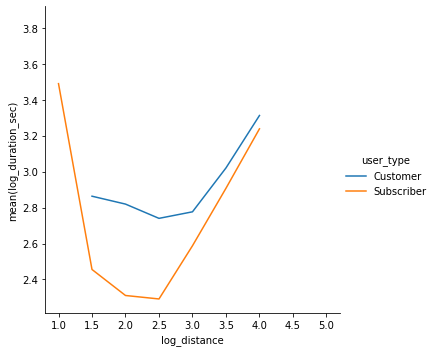

In [75]:
def mean_poly(x, y, bins = 10, **kwargs):
    """ Custom adapted line plot code. """
    # set bin edges if none or int specified
    if type(bins) == int:
        bins = np.linspace(x.min(), x.max(), bins+1)
    bin_centers = (bin_edges[1:] + bin_edges[:-1]) / 2

    # compute counts
    data_bins = pd.cut(x, bins, right = False,
                       include_lowest = True)
    means = y.groupby(data_bins).mean()

    # create plot
    plt.errorbar(x = bin_centers, y = means, **kwargs)

bin_edges = np.arange(0.25, bike_data['log_distance'].max()+0.5, 0.5)
g = sb.FacetGrid(data = bike_data, hue = 'user_type', size = 5)
g.map(mean_poly, "log_distance", "log_duration_sec", bins = bin_edges)
g.set_ylabels('mean(log_duration_sec)')
g.add_legend()

From the above, it can be infered that as most customers tend to ride long distance and take longer time to complete those distances. Although some subcribers are able to cover more distance in less time, others also followed the trend of customers by taking longer time in covering more distance.

C:\Users\franc\anaconda3\envs\alx_data_env\lib\site-packages\seaborn\axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


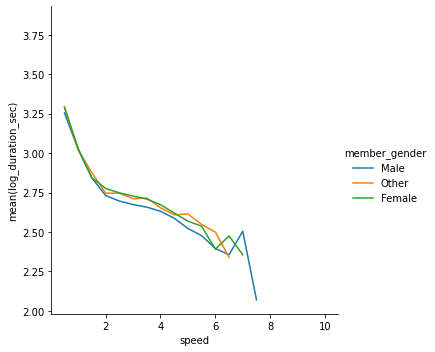

In [76]:
def mean_poly(x, y, bins = 10, **kwargs):
    """ Custom adapted line plot code. """
    # set bin edges if none or int specified
    if type(bins) == int:
        bins = np.linspace(x.min(), x.max(), bins+1)
    bin_centers = (bin_edges[1:] + bin_edges[:-1]) / 2

    # compute counts
    data_bins = pd.cut(x, bins, right = False,
                       include_lowest = True)
    means = y.groupby(data_bins).mean()

    # create plot
    plt.errorbar(x = bin_centers, y = means, **kwargs)

bin_edges = np.arange(0.25, bike_data['speed'].max()+0.5, 0.5)
g = sb.FacetGrid(data = bike_data, hue = 'member_gender', size = 5)
g.map(mean_poly, "speed", "log_duration_sec", bins = bin_edges)
g.set_ylabels('mean(log_duration_sec)')
g.add_legend()

From the above, we can assume that the gender of a rider does not affect the speed the individual uses to ride a bike. Male, Female and other gender type followed similar trend. As the speed increases, the duration to complete a ride decreases also.

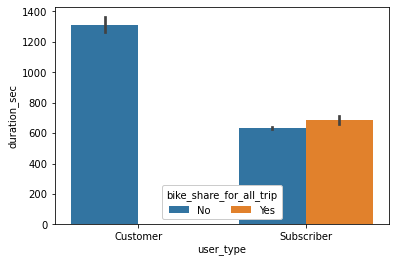

In [77]:
ax = sb.barplot(data = bike_data, x = 'user_type', y = 'duration_sec', hue = 'bike_share_for_all_trip')
ax.legend(loc = 8, ncol = 3, framealpha = 1, title = 'bike_share_for_all_trip');

It appears that customers do not like sharing their bikes. While for subsribers, there was not much difference in the time taking to complete a ride for this usertype

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> User types with high number of bike sharing tend not to covered more distance. It seems like non of the riders who are customers are willing to share their bikes
 

### Were there any interesting or surprising interactions between features?

> The gender of a rider does not affect the speed the individual uses to ride a bike